In [18]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Importation du dataset
df = pd.read_csv("/content/top_1000_popular_movies_tmdb.csv", lineterminator='\n')

In [20]:
#Affichage des 5 premières lignes
df.head()

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,0,385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.
1,1,603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out."
2,2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628,3394.458,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1308766975,92,NaN
3,3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000,"['Columbia Pictures', 'Sony Pictures Animation...",313522201,140,It's how you wear the mask that matters
4,4,536437,Hypnotic,2023-05-11,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154,2654.854,A detective becomes entangled in a mystery inv...,70000000,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0,94,Control is an illusion.


In [21]:
#Information sur le dataset et analyse de base
df.shape

(10000, 15)

In [22]:
df.isnull().sum()

Unnamed: 0                 0
id                         0
title                      0
release_date              23
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  76
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2617
dtype: int64

In [23]:
#Afficher le noms des colonnes
df.columns

Index(['Unnamed: 0', 'id', 'title', 'release_date', 'genres',
       'original_language', 'vote_average', 'vote_count', 'popularity',
       'overview', 'budget', 'production_companies', 'revenue', 'runtime',
       'tagline'],
      dtype='object')

In [24]:
#Enelever des colonnes non utilisées
df.drop(['Unnamed: 0', 'id','runtime','production_companies'], axis=1, inplace=True)

In [25]:
#Creation d'une colonne profit
df['profit'] = df['revenue'] - df['budget']

In [26]:
#convertir la colonne release_date en format date
df["release_date"] = pd.to_datetime(df["release_date"])

#création d'une nouvelle colonne retenant l'année
df["release_year"] = df["release_date"].dt.year

df.head()

,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,revenue,tagline,profit,release_year
0,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,652000000,The end of the road begins.,312000000,2023.0
1,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,431769198,"No way back, one way out.",341769198,2023.0
2,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628,3394.458,"While working underground to fix a water main,...",100000000,1308766975,NaN,1208766975,2023.0
3,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000,313522201,It's how you wear the mask that matters,213522201,2023.0
4,Hypnotic,2023-05-11,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154,2654.854,A detective becomes entangled in a mystery inv...,70000000,0,Control is an illusion.,-70000000,2023.0


In [27]:
#Afficher les différentes langues
df['original_language'].unique()

array(['English', 'Spanish', 'Finnish', 'Polish', 'German', 'Korean',
       'Chinese', 'Japanese', 'French', 'Dutch', 'Portuguese', 'Italian',
       'Danish', 'Tagalog', 'Ukrainian', 'Russian', 'Norwegian',
       'Romanian', 'Tamil', 'Swedish', 'Telugu', 'Icelandic', 'Turkish',
       'Basque', 'cn', 'Indonesian', 'Thai', 'Macedonian', 'Arabic',
       'Serbian', 'Hindi', 'sh', 'Vietnamese', 'Bulgarian', 'Galician',
       'Greek', 'Lao', 'Persian', 'Catalan', 'xx', 'Czech', 'Malayalam',
       'Irish', 'Hebrew', 'Oriya', 'Kannada', 'Bosnian',
       'Norwegian Bokmal', 'Haitian', 'Khmer', 'Hungarian', 'Dzongkha'],
      dtype=object)

In [28]:
print(df.loc[df['original_language'] == 'cn'].head())

                                    title release_date  \
498  Raped by an Angel 2: The Uniform Fan   1998-03-06   
586      3-D Sex and Zen: Extreme Ecstasy   2011-04-14   
594                    Erotic Ghost Story   1990-05-19   
677                     Raped by an Angel   1993-05-27   
734                            The Gigolo   2015-01-29   

                                                genres original_language  \
498                             ['Horror', 'Thriller']                cn   
586  ['Drama', 'Adventure', 'Romance', 'Action', 'H...                cn   
594                     ['Fantasy', 'Drama', 'Horror']                cn   
677                              ['Thriller', 'Crime']                cn   
734                     ['Romance', 'Drama', 'Comedy']                cn   

     vote_average  vote_count  popularity  \
498           4.7          11      75.543   
586           4.9          97      68.161   
594           6.1          38      67.545   
677           

In [29]:
print(df.loc[df['original_language'] == 'xx'])

       title release_date genres original_language  vote_average  vote_count  \
4672  Barbie   1977-01-01     []                xx           2.0           1   

      popularity                                           overview  budget  \
4672      19.298  Barbie comes home from shopping. She takes her...       0   

      revenue tagline  profit  release_year  
4672        0     NaN       0        1977.0  


In [30]:
print(df.loc[df['original_language'] == 'sh'])

                                 title release_date     genres  \
2115  When Father Was Away on Business   1985-01-15  ['Drama']   

     original_language  vote_average  vote_count  popularity  \
2115                sh           7.3         102       30.96   

                                               overview  budget  revenue  \
2115  Tito's break-up with Stalin in 1948 marked the...       0        0   

     tagline  profit  release_year  
2115     NaN       0        1985.0  


In [31]:
#Replacer les valeurs 'cn', 'xx' et 'sh' par les langues qu'elles représentent
language_mapping = {'cn': 'Cantonese', 'xx': 'English', 'sh': 'Serbo-Croatian'}

# Utiliser une function map pour remplacer les codes de langues par leur valeurx complète
df['original_language'] = df['original_language'].map(language_mapping).fillna(df['original_language'])

# Vérifier les valeurs uniques
unique_languages = df['original_language'].unique()

# Print the unique languages
print(unique_languages)


['English' 'Spanish' 'Finnish' 'Polish' 'German' 'Korean' 'Chinese'
 'Japanese' 'French' 'Dutch' 'Portuguese' 'Italian' 'Danish' 'Tagalog'
 'Ukrainian' 'Russian' 'Norwegian' 'Romanian' 'Tamil' 'Swedish' 'Telugu'
 'Icelandic' 'Turkish' 'Basque' 'Cantonese' 'Indonesian' 'Thai'
 'Macedonian' 'Arabic' 'Serbian' 'Hindi' 'Serbo-Croatian' 'Vietnamese'
 'Bulgarian' 'Galician' 'Greek' 'Lao' 'Persian' 'Catalan' 'Czech'
 'Malayalam' 'Irish' 'Hebrew' 'Oriya' 'Kannada' 'Bosnian'
 'Norwegian Bokmal' 'Haitian' 'Khmer' 'Hungarian' 'Dzongkha']


In [32]:
#Afficher le nombre de langues unique
len(unique_languages)

51

In [33]:
#Analyse autour des langues
df['original_language'].value_counts()

English             7305
Japanese             663
Korean               397
French               334
Spanish              298
Cantonese            155
Chinese              154
Italian              151
German                88
Russian               71
Portuguese            49
Tagalog               48
Hindi                 33
Norwegian             29
Swedish               27
Danish                26
Dutch                 23
Thai                  22
Polish                21
Turkish               20
Indonesian            11
Finnish                8
Tamil                  7
Telugu                 7
Arabic                 6
Greek                  6
Ukrainian              4
Persian                3
Basque                 3
Romanian               3
Czech                  3
Vietnamese             3
Icelandic              2
Serbian                2
Galician               2
Bosnian                1
Norwegian Bokmal       1
Khmer                  1
Haitian                1
Oriya                  1


Text(0.5, 0, 'Language')

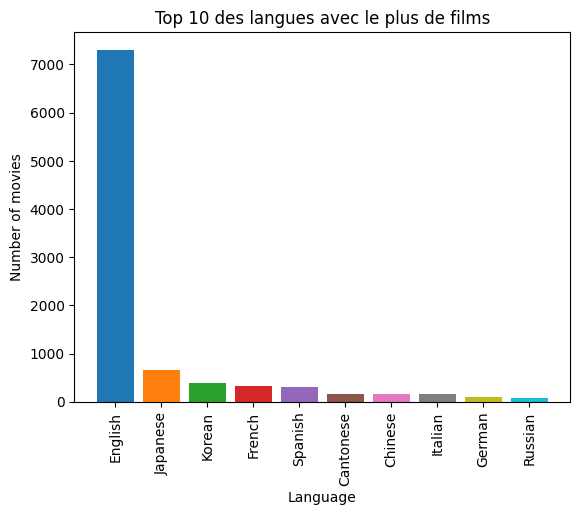

In [59]:
# Top 10 des langues avec le plus de film
language = df['original_language'].value_counts().sort_values(ascending=False).head(10)
plt.bar(language.index,height= language, color=col_map.colors)
plt.title('Top 10 des langues avec le plus de films')
plt.xticks(rotation=90)
plt.ylabel('Number of movies')
plt.xlabel('Language')

In [35]:
#Afficher les 10 langues avec le plus de films populaires
most_popularity_lng=df.groupby('original_language')['popularity'].mean().sort_values(ascending=False).head(10)


most_popularity_lng

original_language
Finnish       162.995125
Polish         83.085095
Icelandic      60.372000
Ukrainian      58.937000
Romanian       57.975333
Macedonian     50.725000
Basque         40.406000
Chinese        38.696344
Spanish        38.193822
Dutch          36.123087
Name: popularity, dtype: float64

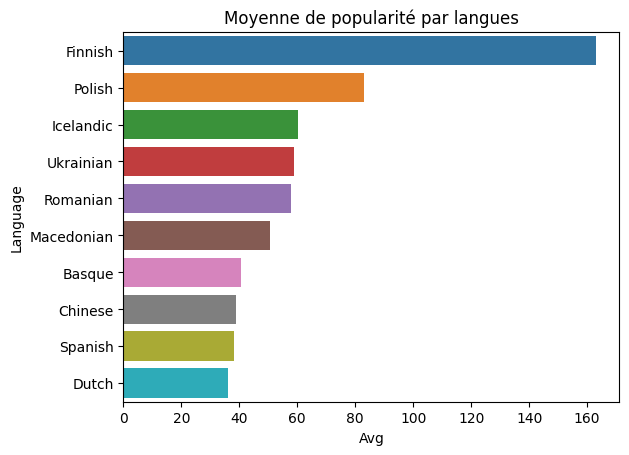

In [36]:
plt.figure#(figsize=(40, 40))
sns.barplot(x=most_popularity_lng.values, y=most_popularity_lng.index, data=df)
plt.title('Moyenne de popularité par langues')
plt.xlabel('Avg')
plt.ylabel('Language')
plt.show()

In [37]:
#Analyse selon les genres
df['genres'].unique()

array(["['Action', 'Crime', 'Thriller']",
       "['Action', 'Thriller', 'Crime']",
       "['Animation', 'Family', 'Adventure', 'Fantasy', 'Comedy']", ...,
       "['Fantasy', 'Thriller']",
       "['Action', 'Adventure', 'Comedy', 'History', 'Fantasy']",
       "['Crime', 'Drama', 'History', 'Romance']"], dtype=object)

In [38]:
#Obtenir la liste de tous les genres uniques
genres = []

def getGenre(arr):
    if isinstance(arr, list):
        for i in arr:
            genres.append(i)
    return arr

df['genres'].apply(lambda x: getGenre(eval(x)))
genres = set(genres)

print(genres)

{'Action', 'Western', 'TV Movie', 'Mystery', 'Family', 'Crime', 'Documentary', 'Adventure', 'Romance', 'History', 'Thriller', 'Science Fiction', 'Horror', 'Fantasy', 'Animation', 'Drama', 'War', 'Music', 'Comedy'}


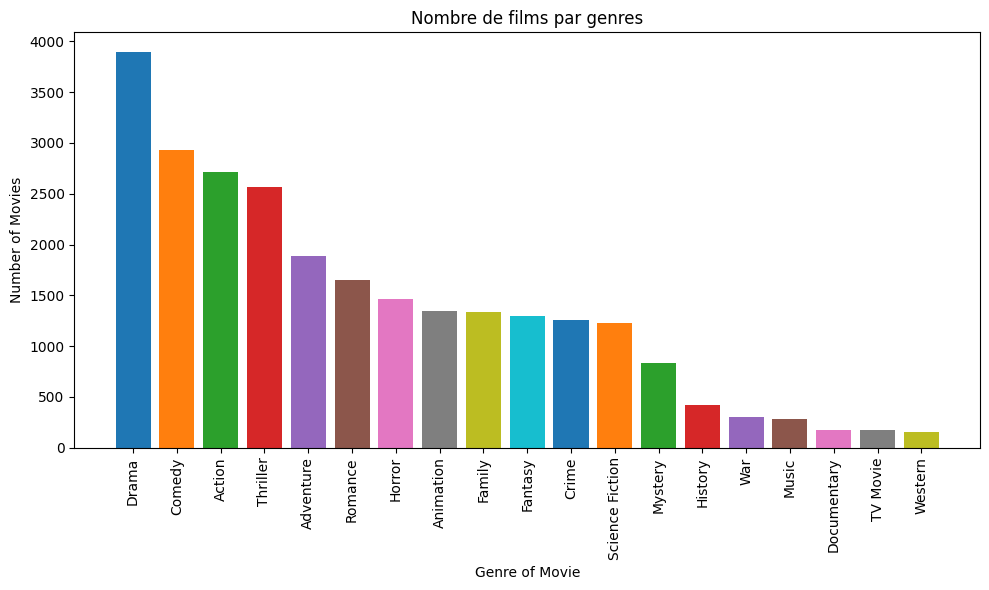

In [58]:
#Afficher le nombre de films par genre unique
genres_count = {}

# Iterate through each row in the 'genres' column and count the genres
for genres_list in df['genres']:
    genres = eval(genres_list)
    for genre in genres:
        if genre in genres_count:
            genres_count[genre] += 1
        else:
            genres_count[genre] = 1

# Convert the genres_count dictionary to a DataFrame
genres_count_df = pd.DataFrame.from_dict(genres_count, orient='index', columns=['Count'])
genres_count_df.reset_index(inplace=True)
genres_count_df.rename(columns={'index': 'Genre'}, inplace=True)

# Sort the DataFrame by count (if desired)
genres_count_df = genres_count_df.sort_values(by='Count', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(genres_count_df['Genre'], genres_count_df['Count'], color=col_map.colors)
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.xlabel('Genre of Movie')
plt.title('Nombre de films par genres')
plt.tight_layout()
plt.show()


In [44]:
#Afficher le nombre de genre unique
genres_col = df['genres']
# Empty set to store unique genres
unique_genres = set()
# Iterate over each row in the genres column
for genres_list in genres_col:
    genres = eval(genres_list)  # Convert the string representation of list to a list
    unique_genres.update(genres)  # Add the genres to the set

len(unique_genres)

19

In [45]:
#Afficher les 5 films les plus populaire pour chaque genre
for genre in unique_genres:
    movies = df[df['genres'].str.contains(genre)].sort_values('popularity', ascending=False).head(5)
    movie_title = movies['title']
    print(genre)
    for i ,title in enumerate(movie_title):
        print(i+1, title)
    print("\n")

Action
1 Fast X
2 John Wick: Chapter 4
3 Spider-Man: Across the Spider-Verse
4 Transformers: Rise of the Beasts
5 Avatar: The Way of Water


Western
1 Two Sinners and a Mule
2 Django Unchained
3 Homestead
4 Organ Trail
5 Tombstone


TV Movie
1 Rooming With Danger
2 The Boss Baby: Christmas Bonus
3 Miraculous World: New York, United HeroeZ
4 Love's Greek to Me
5 Falling for a Killer


Mystery
1 Hypnotic
2 Operation Seawolf
3 To Catch a Killer
4 Scream VI
5 Tin & Tina


Family
1 The Super Mario Bros. Movie
2 The Little Mermaid
3 Crater
4 Puss in Boots: The Last Wish
5 Peter Pan & Wendy


Crime
1 Fast X
2 John Wick: Chapter 4
3 Accident Man: Hitman's Holiday
4 To Catch a Killer
5 Extras For Chasing The Dragon


Documentary
1 Money Shot: The Pornhub Story
2 Spider-Man: All Roads Lead to No Way Home
3 The Biggest Little Farm: The Return
4 Miley Cyrus – Endless Summer Vacation (Backyard Sessions)
5 Harry Potter 20th Anniversary: Return to Hogwarts


Adventure
1 The Super Mario Bros. Movie
2 

In [46]:
#Analyse du top 10 des films selon plusieurs catégories

In [47]:
#Top 10 des films par catégorie budget, revenu, profit, perte, popularité, nombre de vote et moyenne des votes
max_budget = df.sort_values('budget', ascending=False).head(10)
#max_budget
max_revenue = df.sort_values('revenue', ascending=False).head(10)
#max_revenue
max_profit = df.sort_values('profit', ascending=False).head(10)
#max_profit
max_loss = df.sort_values('profit', ascending=True).head(10)
max_loss['loss'] = -max_loss['profit']
#max_loss
max_popularity = df.sort_values('popularity', ascending=False).head(10)
#max_popularity
max_vc = df.sort_values('vote_count', ascending=False).head(10)
#max_vc
max_va = df.sort_values('vote_average', ascending=False).head(10)
#max_va

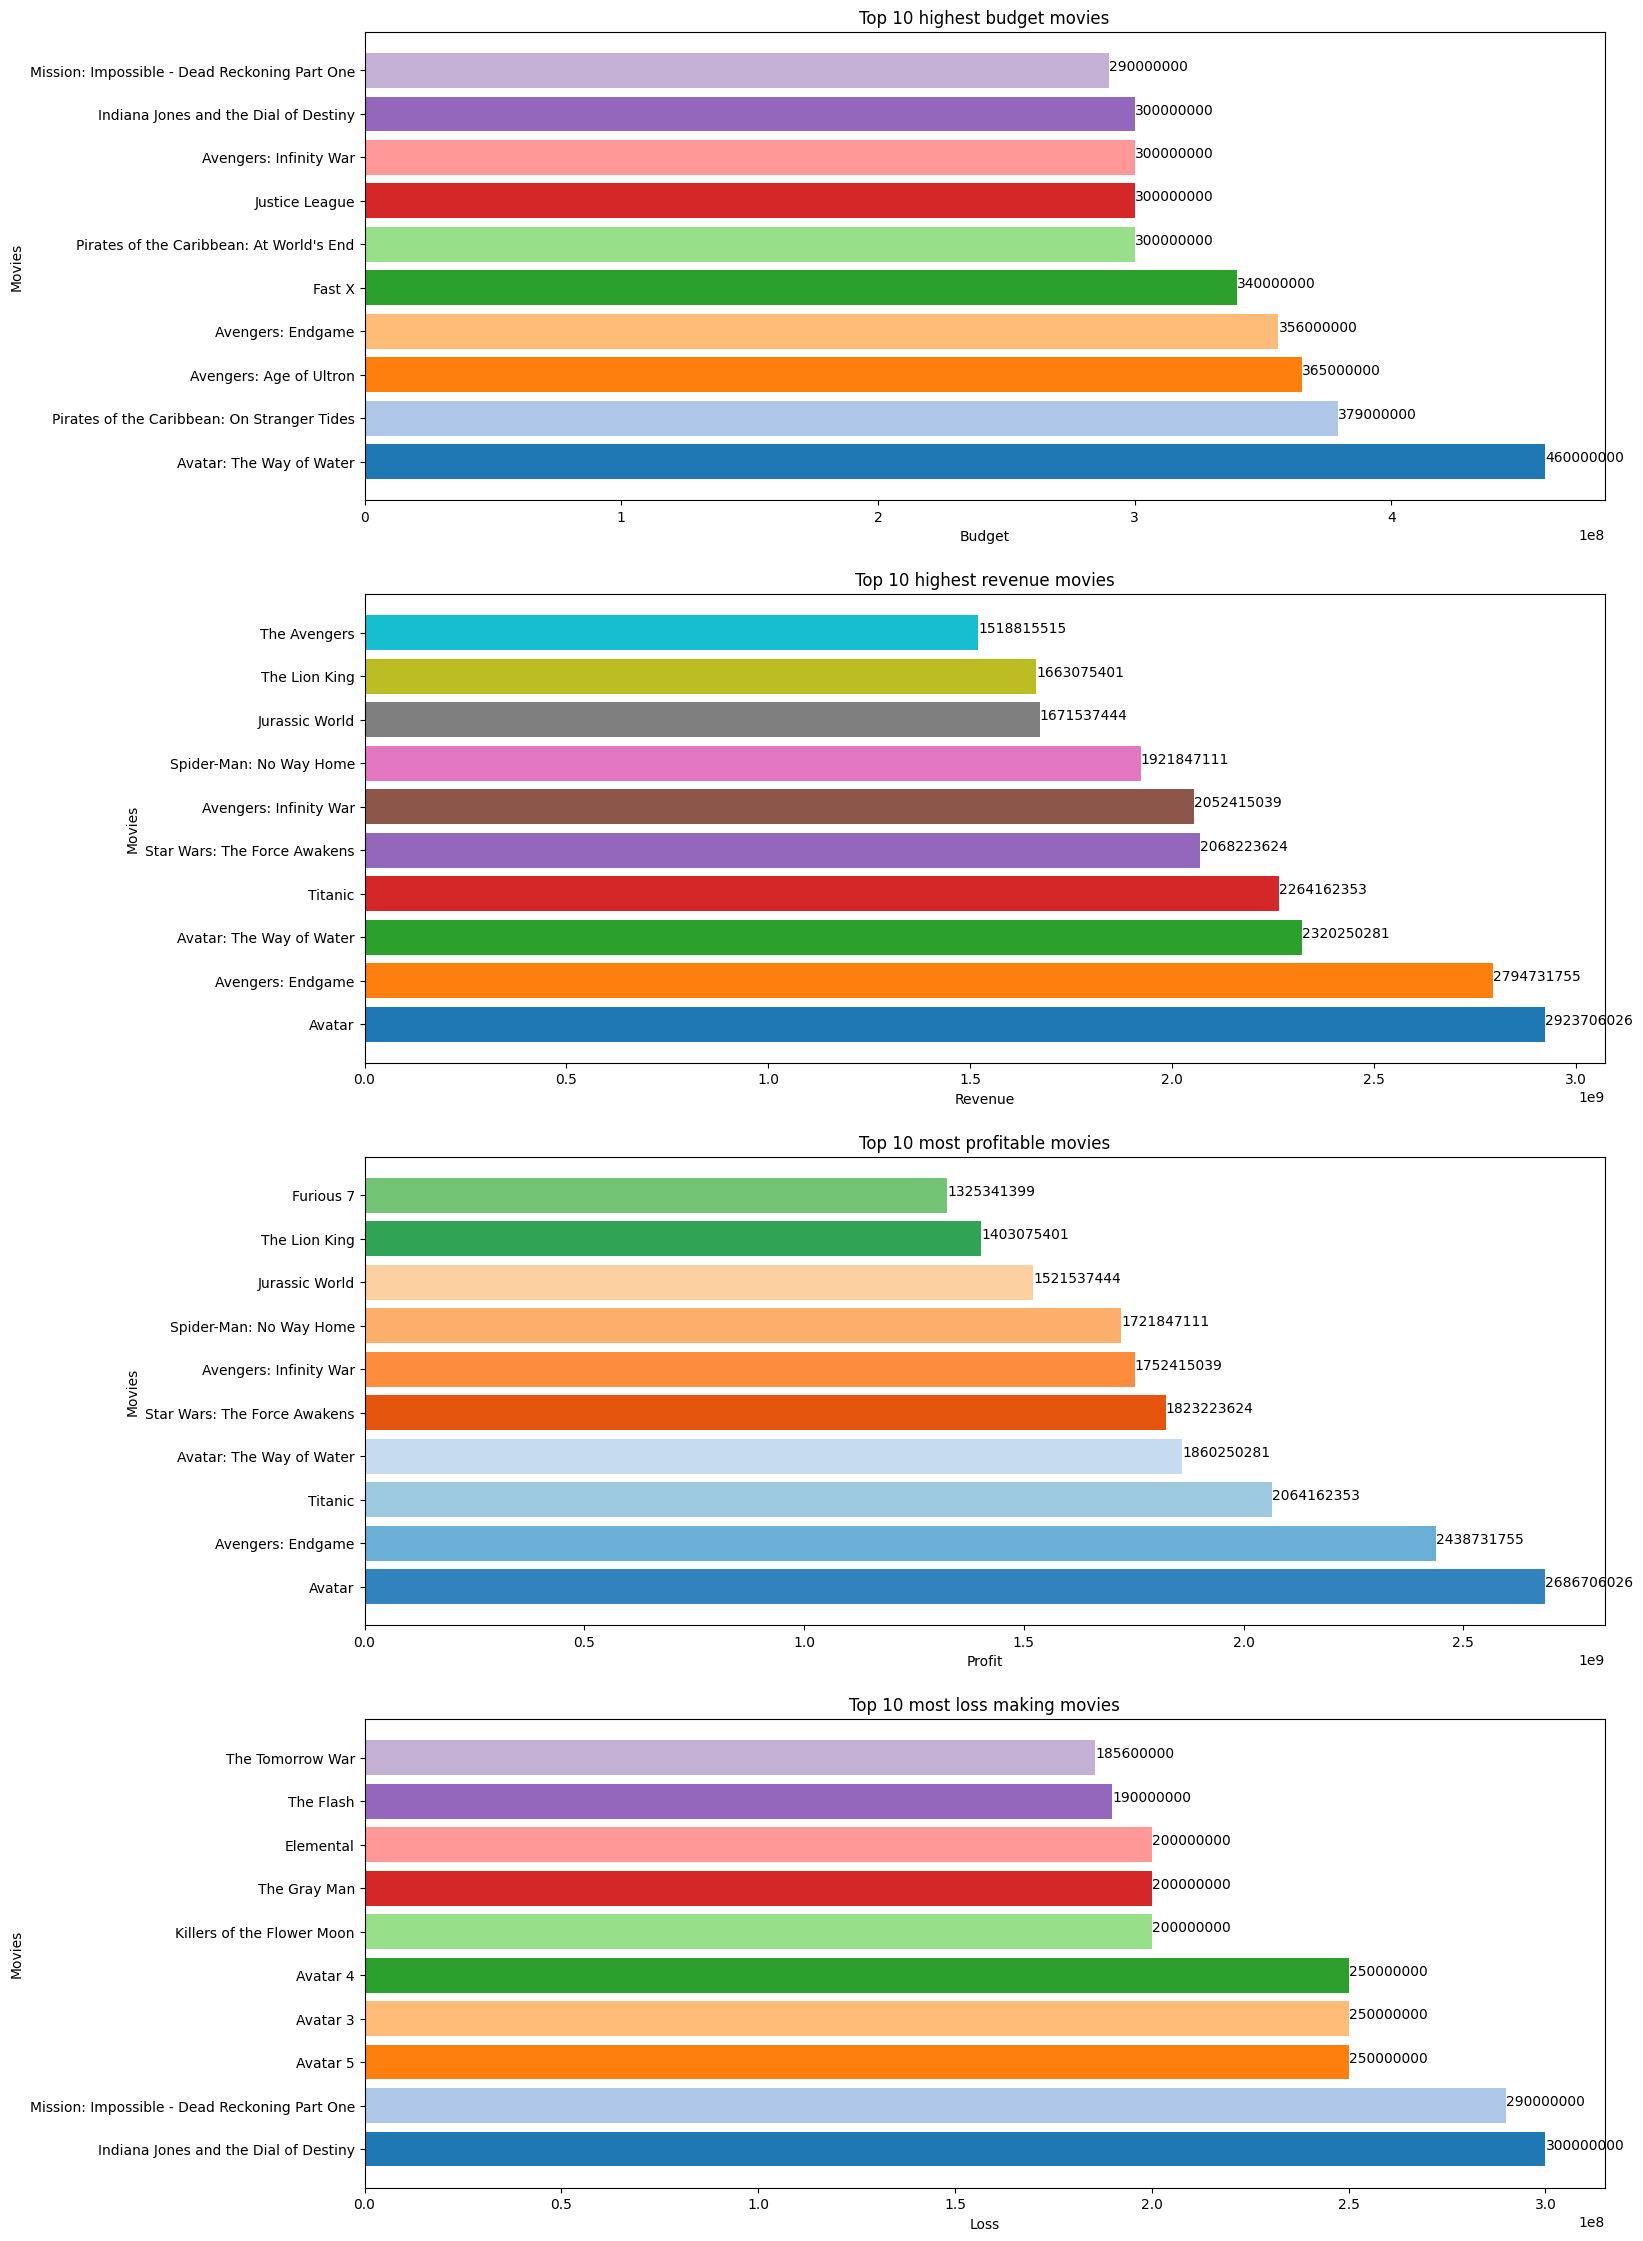

In [48]:
fig, axs = plt.subplots(4,1,figsize=(16,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs[0].set_title('Top 10 highest budget movies')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Movies')
for i in range(len(max_budget)):
    axs[0].text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs[1].set_title('Top 10 highest revenue movies')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs[1].text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_profit['title'], max_profit['profit'], color=col_map.colors)
axs[2].set_title('Top 10 most profitable movies')
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Movies')
for i in range(len(max_profit)):
    axs[2].text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])

col_map = plt.get_cmap('tab20')
axs[3].barh(max_loss['title'], max_loss['loss'], color=col_map.colors)
axs[3].set_title('Top 10 most loss making movies')
axs[3].set_xlabel('Loss')
axs[3].set_ylabel('Movies')
for i in range(len(max_loss)):
    axs[3].text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

plt.show()

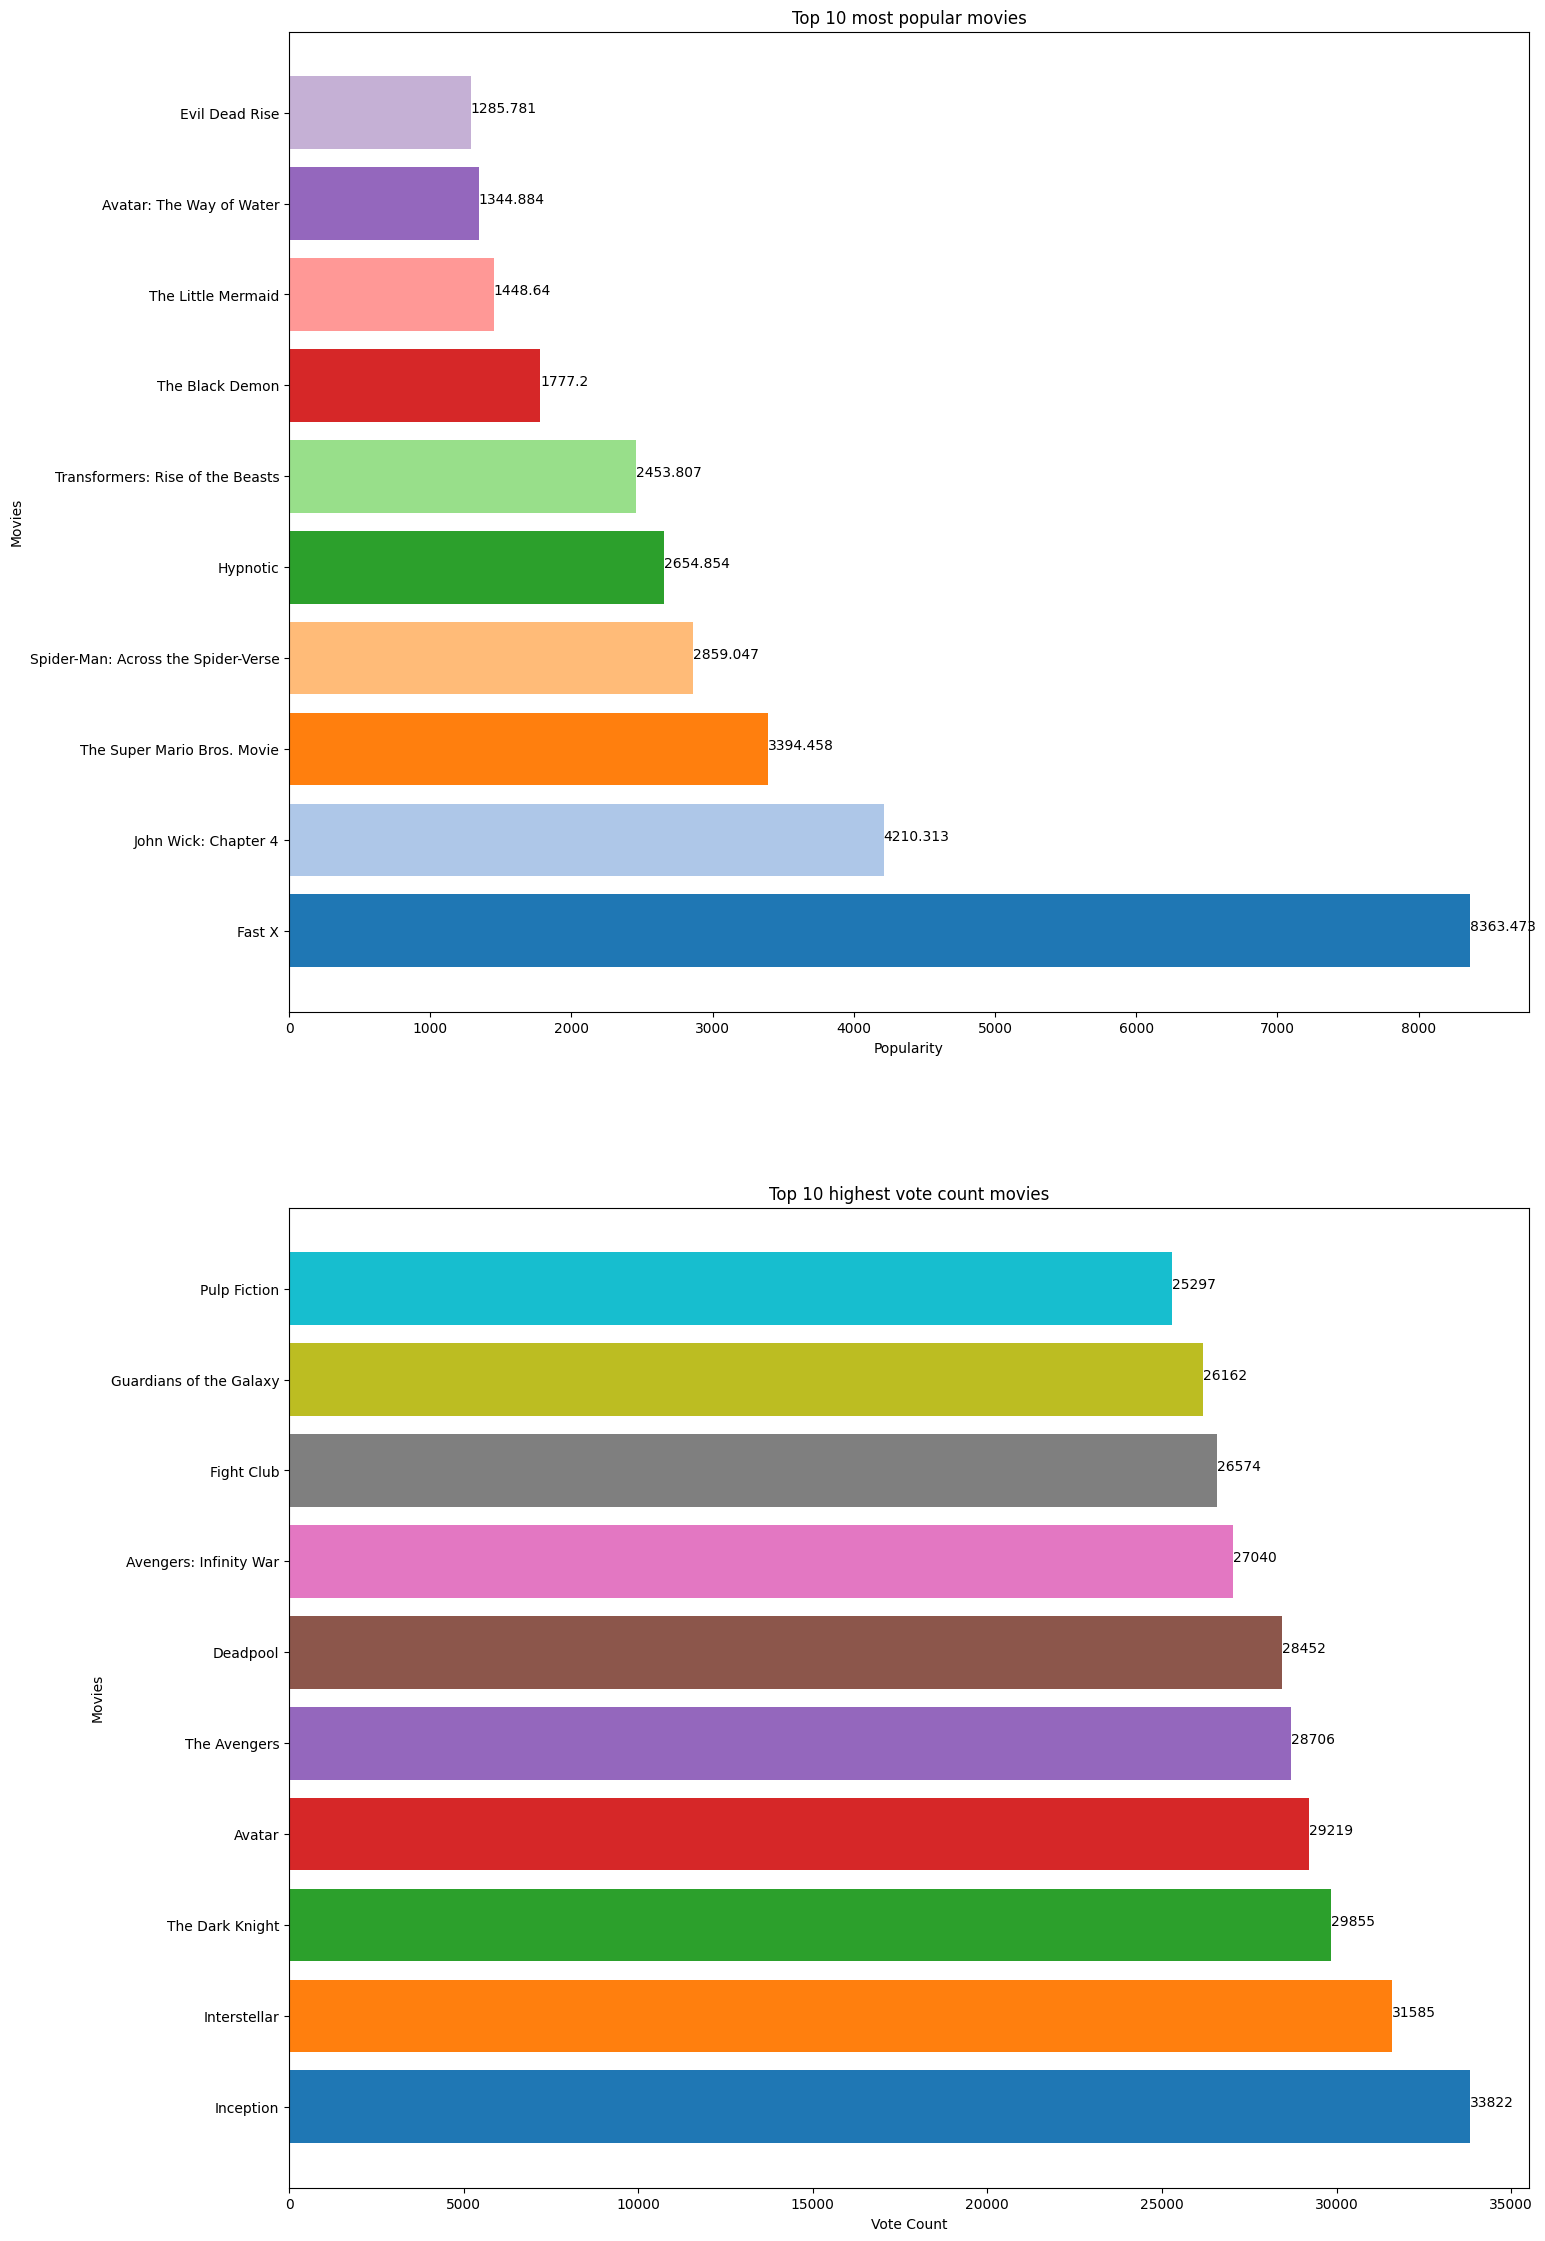

In [57]:
fig, axs = plt.subplots(2,1,figsize=(16,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_popularity['title'], max_popularity['popularity'], color=col_map.colors)
axs[0].set_title('Top 10 most popular movies')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Movies')
for i in range(len(max_popularity)):
    axs[0].text(max_popularity['popularity'].iloc[i], max_popularity['title'].iloc[i], max_popularity['popularity'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_vc['title'], max_vc['vote_count'], color=col_map.colors)
axs[1].set_title('Top 10 highest vote count movies')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Movies')
for i in range(len(max_vc)):
    axs[1].text(max_vc['vote_count'].iloc[i], max_vc['title'].iloc[i], max_vc['vote_count'].iloc[i])

plt.show()

In [55]:
#Analyse par année
#Création d'une variable année
df['year'] = df['release_date'].dt.year
#avg_pop = df.groupby('year')['popularity'].mean()

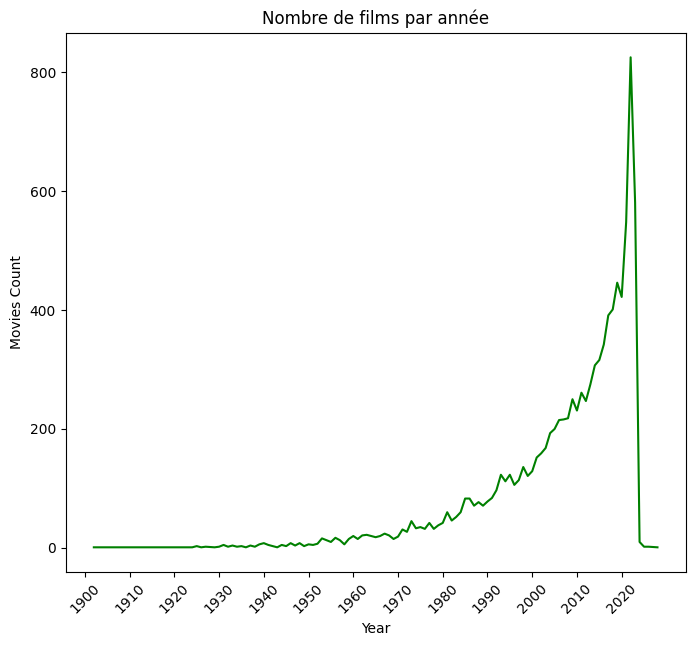

In [60]:
movie_count = df['year'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,7))
plt.plot(movie_count, color='green')
plt.title('Nombre de films par année')
plt.xlabel('Year')
plt.ylabel('Movies Count')
plt.xticks(np.arange(1900, 2030, step=10),rotation=45)
plt.show()